# Analyze Ball on Incline data
Use this notebook to quickly test whether your ball on incline data makes sense!

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

## Reading the data

The function "read_csv(filename)" takes in a filename and returns numpy arrays with time and voltage.

In [2]:
def read_csv(filename):
    """Read CSV from Waveforms"""
    dat = np.genfromtxt(filename, delimiter=',', skip_header=13, names=True)
    time = dat['Time_s']
    voltage = dat['Channel_1_V']
    return time, voltage

def find_midpoints(time, voltage, show_plot=True):
    """Find timing of ball crossings"""
    
    # Write a function yourself, which identifies the peaks in the voltage,
    # and returns values for passing times and (possibly) their uncertainties
    # in it (but they are generally very small!).
    t_pass = [0.0, 0.1]
    t_pass_sigma = [0.0001, 0.00001]
    
    return t_pass, t_pass_sigma

<>:2: SyntaxWarning: invalid escape sequence '\B'
<>:2: SyntaxWarning: invalid escape sequence '\B'
C:\Users\apk\AppData\Local\Temp\ipykernel_10512\4023158045.py:2: SyntaxWarning: invalid escape sequence '\B'
  filename = 'Gr1_Data_BoI\BallIncline_10.csv'


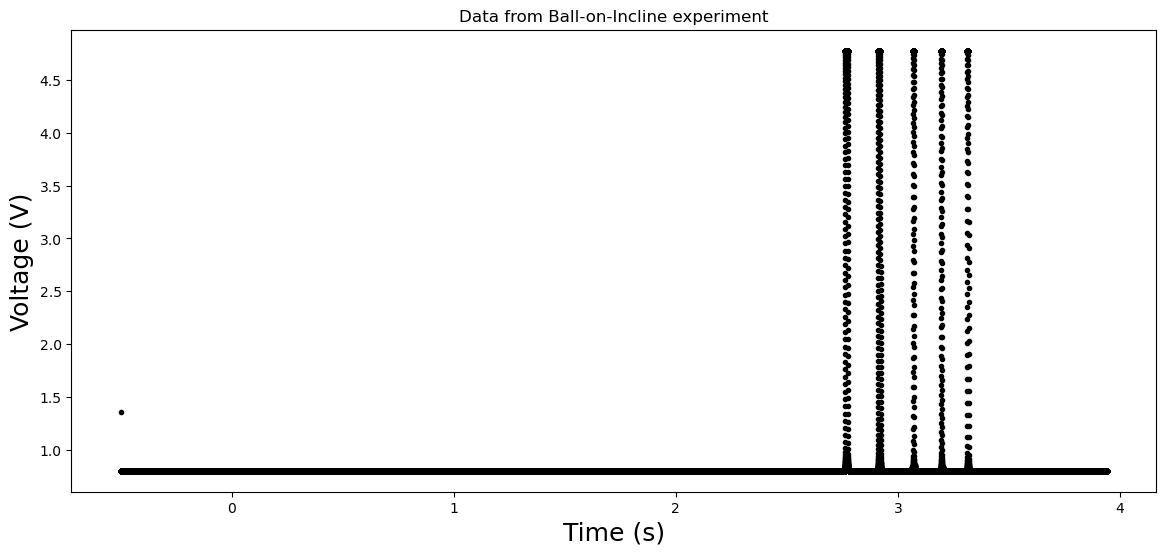

In [3]:
# Read the data and plot it (possibly with passing times in):
filename = 'Gr1_Data_BoI\BallIncline_10.csv'

time, voltage = read_csv(filename)
timepass, timepass_sig = find_midpoints(time, voltage)

plot_bool=True

if plot_bool:
    fig, ax = plt.subplots(figsize=(14, 6))
    ax.plot(time, voltage, 'k.', label='Measurements')
    ax.set_title("Data from Ball-on-Incline experiment")
    ax.set_xlabel("Time (s)", fontsize=18)
    ax.set_ylabel("Voltage (V)", fontsize=18)

# What to do next?

From the V(t) data you should be able to determine five times at which the ball passed. Discuss in the group how to do this best, and possibly test it by seeing if the result is "invariant" between different data sets.

Note that getting an uncertainty can be hard, and think about the relevance of such an uncertainty, which should anyway be rather small.

In [4]:
#Trying to fit five gaussians to the above data.

def gauss_pdf(x,mu,sigma):
    1/(np.sqrt(2*np.pi)*sigma)*np.exp(-(x-mu)**2/(2*sigma**2))

#Defining a chi^2 fit:

def chi2_own(mu,sigma):
    y_fit=gauss_pdf(x_data,mu,sigma)
    chi2=np.sum(((y_data-y_fit)/sigma_y)**2)
    return chi2

#cfit=chi2_own(time,voltage,sigma_y,gauss_pdf)

#Defining the fit:
#mfit=Minuit(cfit,mu=0,sigma=0.01)
#mfit.migrad()

Fit does not make sense so far, as we do not know what uncertainties to work with. Instead, working out the as seems-means of the peaks, subtracting these to get the time intervals:

In [5]:
#Since it does not make sense to do a fit without uncertainties, I cull 0-data and find the means of the peaks:

def mask_func(time,voltage):

    mask=voltage[1:]>0.95
    #Also removing first point, as this seems like a weird outlier.
    time_filtered=time[1:][mask]
    voltage_filtered=voltage[1:][mask]
    return(time_filtered,voltage_filtered)

time_filtered,voltage_filtered=mask_func(time,voltage)

#Finding first and last index in range to determine mean of that range:

def idx_in_range(x,y,xmin,xmax):
    rmask=(x>xmin) & (x<xmax)
    idx_out=[]
    for i in range(len(rmask)):
        if rmask[i]:
            idx_out=np.append(idx_out,i)
    return [int(idx_out[0]),int(idx_out[-1])]

#List of 6 x-values between peaks, manually entered:

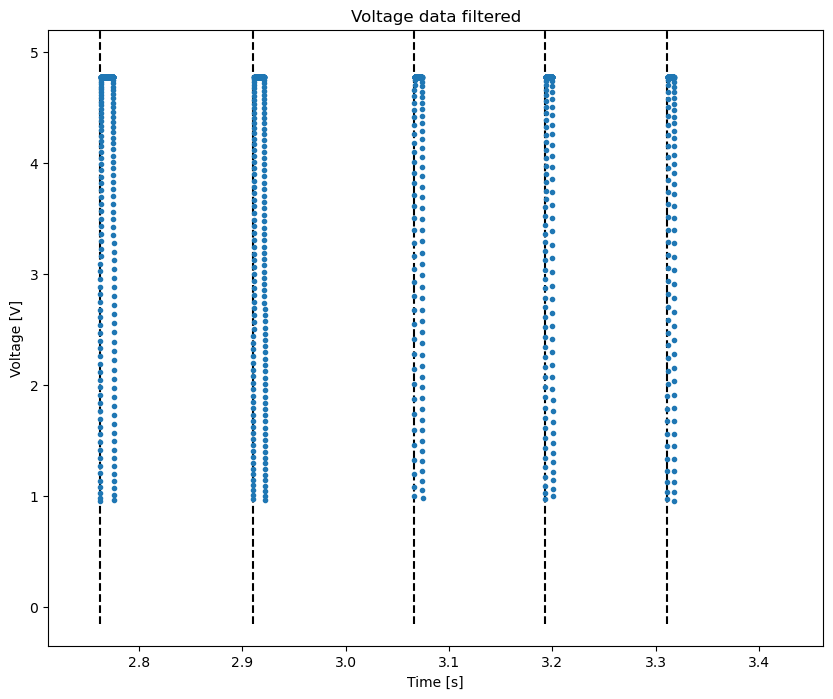

In [6]:
#Enter the Time-values just before first peak, and the rest of the intervals should be calculated.

#Plotting edge points:
plt.figure(figsize=(10,8))
time_peak=np.array([])

#Defining function finding peak of signal. S0: Enter the Time-values just before first peak, and the rest of the intervals should be calculated.

def signal_peak(time,voltage,where,plotbool):
    #where is string input of either "first" or "center", as in where to take ball measurement.
    s0=time[0]-0.05
    s1=s0+(1.13-0.98)
    s2=s1+(1.29-1.13)
    s3=s2+(1.42-1.29)
    s4=s3+(1.53-1.42)
    s5=s4+0.1

    intervals=np.array([s0,s1,s2,s3,s4,s5])

    #Finding edges of peaks:
    p=[]
    for i in range(len(intervals)-1):
        item=idx_in_range(time,voltage,intervals[i],intervals[i+1])
        p.append(item)

    time_peak=np.array([])
    time_first=np.array([])
    if where=="center":
        for idx in p:
            mean=(time[idx[1]]-time[idx[0]])/2+time[idx[0]]
            time_peak=np.append(time_peak,mean)
            if plotbool:    
                plt.vlines(mean,ymin=-0.15,ymax=6,linestyles="dashed",label="Mean",color="black")
            print("Peak times:" +str(time_peak))
        out=time_peak
    elif where=="first":
        for idx in p:
            first=time[idx[0]]
            time_first=np.append(time_first,first)
            if plotbool:
                plt.vlines(first,ymin=-0.15,ymax=6,linestyles="dashed",label="Mean",color="black")
        out= time_first
    if plotbool:
        plt.plot(time,voltage,'.')
        plt.title("Voltage data filtered")
        plt.xlabel("Time [s]")
        plt.ylabel("Voltage [V]")
        plt.xlim(intervals[0],intervals[-1]+0.1)
        plt.ylim(-0.35,5.2)
        plt.show()
    return out

sig_times=signal_peak(time_filtered,voltage_filtered,"first",True)

Defining the time intervals:

In [7]:
#Defining af dif_func:
def dif_func(data):
    data_out=np.array([])
    for i in range(len(data)-1):
        data_out=np.append(data_out,data[i+1]-data[i])
    return data_out

#The time intervals are:
t_int=dif_func(sig_times)
print("Time intervals are: " + str(t_int))

#Dividing the given lengths by these to get velocities (no error propagation yet). Lengths are assumed to be calculated to a mean with a std:

#Length differences to m:
len_array=(np.array([26.95,38.25,53.30,68.15,83.95])-11.85)*0.01
len_dif=dif_func(len_array)
print(len_dif)

#Velocities calculated as dL/dt:

u=len_dif/t_int
print("Velocities: ", str(u))

du=dif_func(u)
a=du/(t_int[1:])
print("Accelerations: ", str(a))

Time intervals are: [0.14818 0.15566 0.12684 0.1185 ]
[0.113  0.1505 0.1485 0.158 ]
Velocities:  [0.76258604 0.96685083 1.17076632 1.33333333]
Accelerations:  [1.31224968 1.60765919 1.37187353]


1
Accelerations:  [1.29731691 1.61060669 1.34205921]
2
Accelerations:  [1.29708952 1.62652734 1.32725198]
3
Accelerations:  [1.30230396 1.60646745 1.33197823]
4
Accelerations:  [1.30259843 1.6044361  1.33018342]
5
Accelerations:  [1.30708559 1.61964391 1.34408601]
6
Accelerations:  [1.29834004 1.60817158 1.35149463]
7
Accelerations:  [1.30499659 1.6067146  1.3314265 ]
8
Accelerations:  [1.30038124 1.61474962 1.32277067]
9
Accelerations:  [1.30162927 1.61914891 1.35157988]
10
Accelerations:  [1.31224968 1.60765919 1.37187353]
1
Accelerations:  [1.30499659 1.59651475 1.32185143]
2
Accelerations:  [1.30568546 1.6130379  1.34540841]
3
Accelerations:  [1.31366806 1.60986571 1.33529552]
4
Accelerations:  [1.30550864 1.61693026 1.34151871]
5
Accelerations:  [1.30599747 1.61841307 1.33193759]
6
Accelerations:  [1.30539214 1.61694274 1.36266036]
7
Accelerations:  [1.32063686 1.60560258 1.35314389]
8
Accelerations:  [1.31390465 1.61513352 1.34341   ]
9
Accelerations:  [1.31837945 1.61028099 1.35

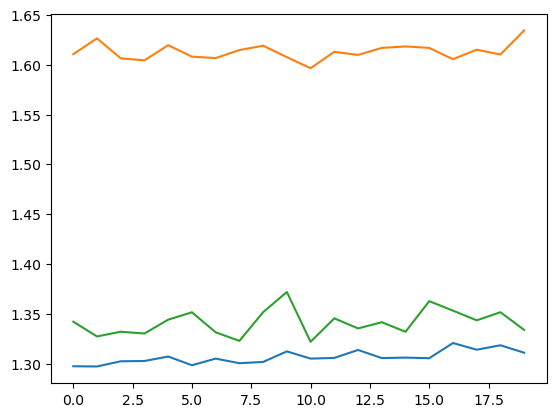

In [ ]:
from pathlib import Path

def tot_func(file_number,plotbool,datanumb):
    if datanumb==1:
        p = Path("Gr1_Data_BoI") / f"BallIncline_{file_number}.csv"
    elif datanumb==2:
        p = Path("Gr1_Data_BoI") / f"BallIncline_rot_{file_number}.csv"

    print(file_number)
    #print("Looking for file:", p)
    if not p.exists():
        raise FileNotFoundError(f"File not found: {p.resolve()}")
    time, voltage = read_csv(str(p))

    time_filtered,voltage_filtered = mask_func(time,voltage)

    sig=signal_peak(time_filtered,voltage_filtered,"first",plotbool)

    t_int=dif_func(sig)
    #print("Time intervals are: " + str(t_int))

    u=len_dif/t_int
    #print("Velocities: ", str(u))

    du=dif_func(u)
    a=du/(t_int[1:])
    print("Accelerations: ", str(a))

    return a

#issue with plotting, fix:

acc_array=[]
for itm in data_numb:
    for i in range(10):
        acc_array.append(tot_func(i+1,False,itm))

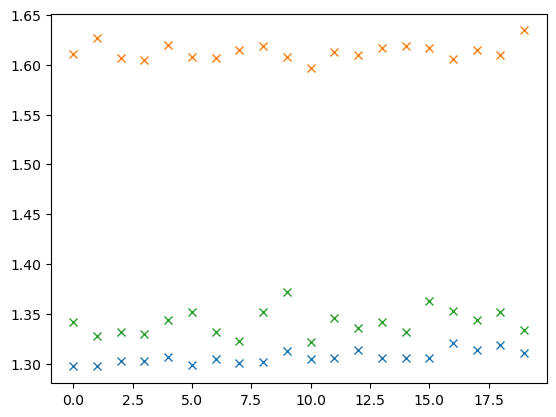

In [16]:
plt.plot(acc_array,'x')

**Preliminary calculations for each dataset (D1: dataset1 etc.)**


D4 Accelerations:  [1.30259843 1.6044361  1.33018342]